In [60]:
import pandas as pd

In [61]:
with open('SMSSpamCollection.txt','r') as File:
    txt = File.readlines()

In [62]:
x=[]
y = []
for i,value in enumerate(txt):
    data = value.split('\t')
    data_x = data[1].split("\n")
    y.append(data[0]) 
    x.append(data_x[0])

print(x,"\n",y)


['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...', 'Ok lar... Joking wif u oni...', "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's", 'U dun say so early hor... U c already then say...', "Nah I don't think he goes to usf, he lives around here though", "FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv", 'Even my brother is not like to speak with me. They treat me like aids patent.', "As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune", 'WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.', 'Had your mobile 

In [63]:
len(x),len(y)

(5574, 5574)

In [64]:
y[10]

'ham'

In [65]:
import re

In [66]:
for i in range(len(x)):
    x[i] = re.sub('[^a-zA-Z ]','',x[i]).lower()

In [67]:
x

['go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat',
 'ok lar joking wif u oni',
 'free entry in  a wkly comp to win fa cup final tkts st may  text fa to  to receive entry questionstd txt ratetcs apply overs',
 'u dun say so early hor u c already then say',
 'nah i dont think he goes to usf he lives around here though',
 'freemsg hey there darling its been  weeks now and no word back id like some fun you up for it still tb ok xxx std chgs to send  to rcv',
 'even my brother is not like to speak with me they treat me like aids patent',
 'as per your request melle melle oru minnaminunginte nurungu vettam has been set as your callertune for all callers press  to copy your friends callertune',
 'winner as a valued network customer you have been selected to receivea  prize reward to claim call  claim code kl valid  hours only',
 'had your mobile  months or more u r entitled to update to the latest colour mobiles with camera for free call

In [68]:
dt ={"message_email":x,"label":y}
df = pd.DataFrame(dt)

In [69]:
df

,message_email,label
0,go until jurong point crazy available only in ...,ham
1,ok lar joking wif u oni,ham
2,free entry in a wkly comp to win fa cup final...,spam
3,u dun say so early hor u c already then say,ham
4,nah i dont think he goes to usf he lives aroun...,ham
...,...,...
5569,this is the nd time we have tried contact u u...,spam
5570,will b going to esplanade fr home,ham
5571,pity was in mood for that soany other suggest...,ham
5572,the guy did some bitching but i acted like id ...,ham


In [70]:
df['label'].value_counts()

label
ham     4827
spam     747
Name: count, dtype: int64

In [71]:
# !pip install imblearn

In [72]:
ham = df[df['label']=="ham"]
spam = df[df['label']=="spam"]

In [73]:
ham.shape,spam.shape

((4827, 2), (747, 2))

In [74]:
ham = ham.sample(1000)

In [75]:
from imblearn.over_sampling import SMOTE  #(synthetic minorty over sampling technique)

In [76]:
smote = SMOTE()

In [77]:
x=df['message_email']
y=df['label']

In [78]:
# smote.fit_resample(x,y)

In [79]:
blance_df = pd.concat([ham,spam])

In [80]:
blance_df['label'].value_counts()

label
ham     1000
spam     747
Name: count, dtype: int64

In [81]:
blance_df

,message_email,label
4604,and i dont plan on staying the night but i pro...,ham
3985,hey i missed you tm of last night as my phone ...,ham
1391,i wonder how you got online my love had you g...,ham
2329,that day you asked about anand number why,ham
3268,ok then i come n pick u at engin,ham
...,...,...
5539,want explicit sex in secs ring now costs pmi...,spam
5542,asked mobile if chatlines inclu in free mins ...,spam
5549,had your contract mobile mnths latest motorol...,spam
5568,reminder from o to get pounds free call credi...,spam


In [82]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [83]:
x = blance_df['message_email']
y = blance_df['label']
x

4604    and i dont plan on staying the night but i pro...
3985    hey i missed you tm of last night as my phone ...
1391    i wonder how you got online my love  had you g...
2329            that day you asked about anand number why
3268                     ok then i come n pick u at engin
                              ...                        
5539    want explicit sex in  secs ring  now costs pmi...
5542    asked mobile if  chatlines inclu in free mins ...
5549    had your contract mobile  mnths latest motorol...
5568    reminder from o to get  pounds free call credi...
5569    this is the nd time we have tried  contact u u...
Name: message_email, Length: 1747, dtype: object

In [84]:
## bag of word
bow = CountVectorizer(max_features=1700,stop_words='english')

In [85]:
x = bow.fit_transform(x).toarray()

In [86]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [87]:
x.shape

(1747, 1700)

In [112]:
txt = bow.transform(['want explicit sex in secs ring now costs '])


In [89]:
column_name = bow.get_feature_names_out()

In [90]:
x = pd.DataFrame(x,columns=column_name)

#### feature repersentation 
#### vectore repersentation
#### embedding

In [91]:
y = y.map({'ham':0,'spam':1})
y = pd.DataFrame(y)
y

,label
4604,0
3985,0
1391,0
2329,0
3268,0
...,...
5539,1
5542,1
5549,1
5568,1


In [92]:
# import numpy as np
# y = np.array(y)

In [93]:
from sklearn.model_selection import train_test_split

In [94]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.15)

In [95]:
y_train

,label
3280,0
2349,0
804,1
4236,1
4760,1
...,...
4731,0
5332,0
3985,0
3316,1


In [96]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB

In [97]:
md = MultinomialNB()
bnb = BernoulliNB()

In [98]:
md.fit(x_train,y_train)


c:\Users\DeLL\python\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB()

In [99]:
bnb.fit(x_train,y_train)

c:\Users\DeLL\python\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BernoulliNB()

In [100]:
print("MultinomialNB for score")
print("training score", round(md.score(x_train,y_train),2)*100)
print("testing score", round(md.score(x_test,y_test),4)*100)
print("\nBernoulliNB for score")
print("training score", round(bnb.score(x_train,y_train),2)*100)
print("testing score", round(bnb.score(x_test,y_test),4)*100)

MultinomialNB for score
training score 97.0
testing score 95.06

BernoulliNB for score
training score 96.0
testing score 94.67999999999999


In [101]:
import joblib 
joblib.dump(md,"MultinomialNB_model.lb")
joblib.dump(bnb,"bnb_model.lb")
joblib.dump(bow,"CountVectorizer.lb")

['CountVectorizer.lb']

In [113]:
predict =bnb.predict(x_test)
predict_t = bnb.predict(txt)
predict_t[0]

c:\Users\DeLL\python\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  warnings.warn(


1

In [103]:
y_test['predict_value']=predict

In [104]:
y_test[:10]

,label,predict_value
2257,0,0
3818,0,0
1095,0,0
234,0,0
4060,1,1
4126,0,0
3512,0,0
1252,1,1
2680,1,1
576,1,1


In [105]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test['label'],y_test['predict_value'])

In [106]:
matrix

array([[152,   0],
       [ 14,  97]], dtype=int64)

In [107]:
import seaborn as sns 

<Axes: >

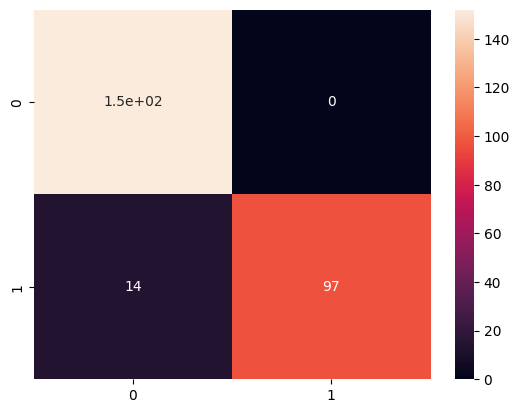

In [108]:
sns.heatmap(matrix,annot=True)